<a href="https://colab.research.google.com/github/Zypher44/RaduIntuneric/blob/master/RNN_and_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro to NLP, NLP has the goal of deriving information out of natural language (could be sequences text or speach) seq2seq

In [1]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-20 22:55:30--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-20 22:55:30 (77.4 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [3]:
from helper_functions import *

In [4]:
#Get a text dataset 

!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data("nlp_getting_started.zip")

--2021-07-20 22:55:35--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.188.208, 142.251.33.208, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.188.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.007s  

2021-07-20 22:55:35 (78.0 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



#Visulizing a text dataset 

In [5]:
import pandas as pd 

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()
#target class 1 = disastor, 0 = non disatstor 

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
#Shuffle train data 

train_df_shuffled = train_df.sample(frac=1, random_state=42) #shuffles all the data
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [7]:
test_df.head() # use the text in the test set to perdict a label 

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
#how many examples of each class?
train_df_shuffled.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
#What are the total number of samples 
len(train_df_shuffled), len(test_df)

(7613, 3263)

In [10]:
#Visualize some random training examples
import random 

random_index = random.randint(0,len(train_df)-5) #len -5 so we dont go past end of train data 

for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples(): #ITertuples will return tuples of text and target
 _, text, target = row
 print(f"target:{target}","(real disastor)" if target > 0 else" (not real diaster)")
 print(f"Text:\n{text}\n")
 print("----\n")

target:1 (real disastor)
Text:
@argentings WE COULD HAVE HAD IT AAAAAAALLLL IÛªm not even on that season and IÛªm devastated

----

target:1 (real disastor)
Text:
@Cali74142290 lol natural disaster/hospital crisis something is needed to get rid of some cast members....

----

target:1 (real disastor)
Text:
@casewrites when it rains in NJ it flash floods. Otherwise its just a desert of grief and taxes.

----

target:0  (not real diaster)
Text:
If you're reading this go accidentally fall off a cliff mate

----

target:1 (real disastor)
Text:
How many trains derailed that @wmata has to shut down orange/blue in most of DC? The Avengers made less of a mess @unsuckdcmetro

----



##Split data in training and validation sets 



In [11]:
from sklearn.model_selection import train_test_split


In [12]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1, #Use 10% of data for validation size
                                                                            random_state=42)

In [13]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)


(6851, 762, 6851, 762)

In [14]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

#Tokenisation - Straight mapping from token to number can be modelled but quickly gets too big
#Embedding - richer representation of relationships between tokens (can limit size + can be learned )

In [15]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

#Use the default textvectorization paramters 
text_vectorizer = TextVectorization(max_tokens=None, #How many words in the vocabulary (automatically addd <00V>)
                                    standardize="lower_and_strip_punctuation",
                                    split='whitespace',
                                    ngrams=None, #Create groups of n-words
                                    output_mode='int',#how to map tokens to numbers
                                    output_sequence_length=None, #Pads each sequence to the longest seqeunce [How long do you want ur sequnces to be]
                                    pad_to_max_tokens=True
                                    )

In [16]:
#Find the average number of tokens in the training tweets 
max_length= round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

In [17]:
max_vocab_length = 10000 #Max number of words to have in our vocabulary
max_length #Max length our sequiences will be 

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [18]:
#Fit the text vectorizer to the training data, convert word data to numbers to feed it to the model
text_vectorizer.adapt(train_sentences)

In [19]:
#Create a sample sentence and tokenize it 

sample_sentence="There's a fire in the hallway"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3,  42,   4,   2,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [20]:
random_sentence = random.choice(train_sentences)
print(f"Oringal text:\n {random_sentence}\n Vectorized Verison:\n")
text_vectorizer([random_sentence])

Oringal text:
 Naaa I bee dead.. Like a legit zombie .. I feel every sore part in my body ?? https://t.co/J4fSDPfA63
 Vectorized Verison:



<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   1,    8, 4104,  115,   25,    3, 2902, 1913,    8,  214,  197,
        4570,  453,    4,   13]])>

In [21]:
#Get the uniuqe words in the vocabulary 

words_in_vocab = text_vectorizer.get_vocabulary()#Get all of the unique words in our trianing data 
top_5_words = words_in_vocab[:5] #Get the most comon words 
bottom_5_words = words_in_vocab[-5:]

print(f"Number of words in vocab:{len(words_in_vocab)}\nTop5 words: {top_5_words}\nBottom 5 words:{bottom_5_words}")

Number of words in vocab:10000
Top5 words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 words:['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


#Creating and embedding using an Embedding layer 

In [22]:
#To embedde we will use tensorflow embedding layer 
# We will care about the Input_dim (size of our vocabulary)
# Output_dim = the size of the output embedding vector, (a value of 100 would mean that the output of the token would be of len 100)
# input_length = length of the sequences being passed to the embedding layer 

from tensorflow.keras import layers 

embedding = layers.Embedding(input_dim=max_vocab_length, #Set input shape
                             output_dim=128, # output shape
                             input_length=max_length) # how long each input 



In [23]:
embedding

In [24]:
#Get random sentecne from training sentece 
print(random_sentence)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Naaa I bee dead.. Like a legit zombie .. I feel every sore part in my body ?? https://t.co/J4fSDPfA63


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.04146413, -0.02204341,  0.00879944, ..., -0.00216888,
         -0.02553005, -0.0142746 ],
        [-0.00212524,  0.0021032 , -0.01371529, ...,  0.03313824,
          0.04800102,  0.0492393 ],
        [-0.02146939,  0.04141412,  0.0420869 , ...,  0.02683269,
          0.02830439,  0.04820651],
        ...,
        [ 0.0367195 ,  0.047816  ,  0.04408226, ...,  0.04535827,
         -0.01843261, -0.03107108],
        [-0.01274369, -0.02210113, -0.02775197, ..., -0.03112464,
         -0.03269634, -0.00150758],
        [ 0.03247715, -0.00169619, -0.03940312, ..., -0.04676704,
          0.02212412, -0.03408563]]], dtype=float32)>

#Modeing a text dataset 

0.   Model0: Navie Bayes (baseline)
1.   Feed-forward neural network(dense model)
2.   LSTM Model (RNN)
3.   GRU Model (RNN)
4.   BiDirectional- LSTM model(RNN)
5.   1D Convolutional Neural network(CNN)
6.   TensorFlow hub Pretrained feature Extractor(using Transfer learning for NLP)
7. Same as model6 with 10% of the training data


#Model 0 baseline 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

#Create tokenization and modeling pipeline

model0 = Pipeline([

                   ("tfidf",TfidfVectorizer()), #Convert words to numbers using Tfidf
                   ("clf", MultinomialNB()) #Model the text clf is classifcation model

])

#Fit pipeline to training data 

model0.fit(
    train_sentences, train_labels
)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [26]:
#Evaluate the baseline model 

baseline_score = model0.score(val_sentences,val_labels)
print(f"Our baseline model acheives a accuracy of {baseline_score*100:.2f}%:")

Our baseline model acheives a accuracy of 79.27%:


In [27]:
#Make perdictions 
baseline_preds = model0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [28]:
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

print("Precision socre")
precision_score(val_labels,baseline_preds)

Precision socre


0.8861788617886179

In [29]:
print("f1_score")
f1_score(val_labels,baseline_preds)

f1_score


0.734006734006734

In [30]:
print("recall score")
recall_score(val_labels,baseline_preds)

recall score


0.6264367816091954

In [31]:
#Create a function so we dont have to do this for our other models 
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, recall_score

baseline_results=calculate_results(val_labels,baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

##Model 1 a simple dense model 

In [32]:
#Create a tensorboard callback 
Save_dir = "model_logs"

In [33]:
#Build model with functional API

inputs = layers.Input(shape=(1,), dtype=tf.string)#Inputs are 1-dimensional strings 
x = text_vectorizer(inputs)#Turn the inputt text into numbers 
x = embedding(x) #Create an embedding of the numberized inputs 
#x = layers.GlobalAveragePooling1D()(x) #Condese feature vector for each token to one vector 
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1,activation='sigmoid')(x) #Create the output layer, want binary outputs so use sigmoid activation function 

model1 = tf.keras.Model(inputs,outputs, name="Model1Dense")


In [34]:
model1.summary()

Model: "Model1Dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Compile model 

model1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [36]:
history1= model1.fit(
    x=train_sentences, 
    y=train_labels,
    epochs=5, 
    validation_data = (val_sentences, val_labels),
    callbacks=[create_tensorboard_callback(Save_dir,"Model1Dense")]
)

Saving TensorBoard log files to: model_logs/Model1Dense/20210720-225603
Epoch 1/5
215/215 [==============================] - 6s 21ms/step - loss: 0.6346 - accuracy: 0.6603 - val_loss: 0.5684 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4670 - accuracy: 0.8291 - val_loss: 0.4747 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3407 - accuracy: 0.8742 - val_loss: 0.4541 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.2577 - accuracy: 0.9082 - val_loss: 0.4551 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.1979 - accuracy: 0.9342 - val_loss: 0.4663 - val_accuracy: 0.7874


In [37]:
#Check the results 
model1.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4663 - accuracy: 0.7874


[0.46633994579315186, 0.787401556968689]

In [38]:
#Make perdicitons and evaulate those 

model1_pred_probs = model1.predict(val_sentences)
model1_pred_probs.shape

(762, 1)

In [39]:
model1_pred_probs[0]

array([0.4885217], dtype=float32)

In [40]:
#Convert model perdicton probailites to label fromat 

model1_preds = tf.squeeze(tf.round(model1_pred_probs))#Remove dimension with squeeze 
model1_preds[:20] 

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [41]:
#Calucalate model 1 results 

model_1_results = calculate_results(y_true=val_labels, y_pred=model1_preds)
model_1_results

{'accuracy': 78.74015748031496,
 'f1': 0.7846966492209201,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497}

In [42]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

#Visualizign learned embeddings

In [43]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

In [44]:
model1.summary()

Model: "Model1Dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [45]:
#Get the weight matrix of embedding layer 
#These are the numerical representations of each token in our training data which have been learned for -5 epochs
embed_weights = model1.get_layer("embedding").get_weights()[0]
embed_weights

array([[-0.01620602, -0.02610922, -0.02803961, ..., -0.0859455 ,
        -0.07913391, -0.11240514],
       [-0.04146413, -0.04535341, -0.02615771, ..., -0.0850148 ,
        -0.08769286, -0.10448726],
       [-0.03001236, -0.03246249, -0.02858569, ..., -0.06853916,
        -0.05190062, -0.0517725 ],
       ...,
       [ 0.03900569, -0.02555531, -0.02278867, ...,  0.03647982,
         0.01261071, -0.02155306],
       [-0.00768056, -0.03157054, -0.03993907, ..., -0.03723338,
        -0.03221883,  0.00167125],
       [ 0.02593461,  0.10489169,  0.05084139, ..., -0.04217453,
         0.00189019, -0.04150397]], dtype=float32)

In [46]:
print(embed_weights.shape)

(10000, 128)


In [47]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [48]:
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Recurrnet Nureal Network RNN 

Rnns are useful for sequence data. 

The Premeise of a recurnet nueral network is to use the representation of a previous input to aid the representation of a later input. 

#Model 2: LSTM

LSTM= Long Short term memory (one of the most popular lstm cells)

Structure:
Input -> tokenize -> embedding -> layer (RNNS/dense) -> output(label probability)



In [49]:
from tensorflow.keras import layers 

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(units=64, return_sequences=True)(x) #When stacking RNN cells together, you need set return sequences =True 
x = layers.LSTM(64,)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1,activation='sigmoid')(x)
model2 =tf.keras.Model(inputs,outputs, name="Model2_LSTM")

In [50]:
#Get summary

model2.summary()


Model: "Model2_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 15, 64)            49408     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 

In [51]:
model2.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [52]:
history2= model2.fit(
    x= train_sentences,
    y= train_labels,
    epochs=5,
    validation_data=(val_sentences,val_labels),
    callbacks=[create_tensorboard_callback(Save_dir,
                                           "Model2_LSTM")]
)

Saving TensorBoard log files to: model_logs/Model2_LSTM/20210720-225653
Epoch 1/5
215/215 [==============================] - 15s 48ms/step - loss: 0.3783 - accuracy: 0.8373 - val_loss: 0.4851 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 9s 41ms/step - loss: 0.2442 - accuracy: 0.9028 - val_loss: 0.6089 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 9s 41ms/step - loss: 0.1790 - accuracy: 0.9318 - val_loss: 0.7750 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 9s 42ms/step - loss: 0.1334 - accuracy: 0.9502 - val_loss: 0.6392 - val_accuracy: 0.7795
Epoch 5/5
215/215 [==============================] - 9s 40ms/step - loss: 0.0994 - accuracy: 0.9599 - val_loss: 0.8846 - val_accuracy: 0.7703


In [54]:
#Make perdicitons with LSTM model 

model2_pred_probs = model2.predict(val_sentences)
model2_pred_probs[:10]

array([[0.04299861],
       [0.9830059 ],
       [0.99982285],
       [0.02073315],
       [0.00150943],
       [0.99981725],
       [0.5727585 ],
       [0.99994576],
       [0.9999256 ],
       [0.10180491]], dtype=float32)

In [55]:
#Convert model 2 pred probs to labels 
model2_preds = tf.squeeze(tf.round(model2_pred_probs))
model2_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0

In [56]:
#Calcluate model 2 results 
model2_results = calculate_results(y_true=val_labels, y_pred=model2_preds)
model2_results

{'accuracy': 77.03412073490814,
 'f1': 0.7663654279032698,
 'precision': 0.776479876261699,
 'recall': 0.7703412073490814}

In [57]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

#Model 3 : GRU cell 

Another popular and effective RNN componet is the GRU or gated recurrent unit 


In [58]:
#Build RNN using GRU cell 

inputs = layers.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(units=64,return_sequences=True)(x) #Stack recurrent cells you need return _sequences 
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(99)(x)
x = layers.Dense(64,activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model3= tf.keras.Model(inputs,outputs)



In [59]:
model3.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
gru (GRU)                    (None, 15, 64)            37248     
_________________________________________________________________
lstm_2 (LSTM)                (None, 15, 64)            33024     
_________________________________________________________________
gru_1 (GRU)                  (None, 99)                49005     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                6400  

In [60]:
model3.compile(
  loss = tf.keras.losses.BinaryCrossentropy(),
  optimizer=tf.keras.optimizers.Adam(),
  metrics=['accuracy']
)

In [61]:
history3 = model3.fit(x=train_sentences,
                      y=train_labels,
                      epochs=5,
                      validation_data=(val_sentences,val_labels),
                      callbacks=[create_tensorboard_callback(Save_dir,
                                                             "Model3_GRU")])

Saving TensorBoard log files to: model_logs/Model3_GRU/20210720-225753
Epoch 1/5
215/215 [==============================] - 18s 59ms/step - loss: 0.1841 - accuracy: 0.9244 - val_loss: 0.6321 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 11s 52ms/step - loss: 0.0907 - accuracy: 0.9657 - val_loss: 1.1286 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 11s 52ms/step - loss: 0.0712 - accuracy: 0.9699 - val_loss: 1.1675 - val_accuracy: 0.7703
Epoch 4/5
215/215 [==============================] - 11s 51ms/step - loss: 0.0658 - accuracy: 0.9708 - val_loss: 1.3134 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 11s 52ms/step - loss: 0.0555 - accuracy: 0.9753 - val_loss: 1.0931 - val_accuracy: 0.7664


In [62]:
model3_predprobs = model3.predict(val_sentences)
model3_predprobs[:10]

array([[5.1141679e-03],
       [6.7957348e-01],
       [9.9783069e-01],
       [8.2925916e-02],
       [3.3705142e-05],
       [9.9492168e-01],
       [9.0306497e-01],
       [9.9880815e-01],
       [9.9895740e-01],
       [8.0630684e-01]], dtype=float32)

In [63]:
model3_pred = tf.squeeze(tf.round(model3_predprobs))
model3_pred[10:]

<tf.Tensor: shape=(752,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0

In [64]:
model3_results = calculate_results(y_true=val_labels, y_pred=model3_pred)
model3_results

{'accuracy': 76.64041994750657,
 'f1': 0.7646647680054942,
 'precision': 0.7672473559947978,
 'recall': 0.7664041994750657}

In [65]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

#Model4 : Bidirectioanl 

In [66]:
from keras.layers import LSTM

inputs = tf.keras.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model4 = tf.keras.Model(inputs,outputs)


In [67]:
 model4.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 15, 128)           98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               74496     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,453,441
Trainable params: 1,453,441
Non-trainable params: 0
_________________________________________________

In [68]:
model4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer= tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [69]:
history4 = model4.fit(
    x=train_sentences,
    y=train_labels,
    epochs=5,
    validation_data=(val_sentences,val_labels),
    callbacks=[create_tensorboard_callback(Save_dir,
                                           "Model4_Bidirectional")]
)

Saving TensorBoard log files to: model_logs/Model4_Bidirectional/20210720-225939
Epoch 1/5
215/215 [==============================] - 22s 72ms/step - loss: 0.1331 - accuracy: 0.9492 - val_loss: 0.8464 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 13s 60ms/step - loss: 0.0636 - accuracy: 0.9712 - val_loss: 1.3142 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 13s 61ms/step - loss: 0.0500 - accuracy: 0.9761 - val_loss: 1.0881 - val_accuracy: 0.7192
Epoch 4/5
215/215 [==============================] - 13s 63ms/step - loss: 0.0518 - accuracy: 0.9745 - val_loss: 1.3689 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 13s 62ms/step - loss: 0.0519 - accuracy: 0.9765 - val_loss: 1.2780 - val_accuracy: 0.7559


In [70]:
model4_pred_probs = model4.predict(val_sentences)
model4_pred_probs[:10]

array([[3.5086781e-01],
       [6.7767280e-01],
       [9.9986541e-01],
       [2.1615046e-01],
       [5.6401477e-05],
       [9.9952543e-01],
       [3.9426634e-01],
       [9.9994767e-01],
       [9.9994433e-01],
       [8.6891115e-01]], dtype=float32)

In [71]:
model4_pred = tf.squeeze(tf.round(model4_pred_probs))
model4_pred

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0

In [72]:
model4_results = calculate_results(val_labels,model4_pred)


In [73]:
model4_results

{'accuracy': 75.59055118110236,
 'f1': 0.7546752743603138,
 'precision': 0.7558252056840676,
 'recall': 0.7559055118110236}

In [74]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

# Model 5 Conv1D

In [75]:
#Model 5 building a Conv1d model 

inputs = tf.keras.Input(shape=(1,),dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(32,5,activation ='relu')(x)
x = layers.Conv1D(32,5, activation ='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.GlobalMaxPool1D()(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation='sigmoid')(x)

model5 = tf.keras.Model(inputs,outputs)

In [76]:
model5.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [77]:
model5.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_1 (TextVe (None, 15)                0         
_________________________________________________________________
embedding (Embedding)        (None, 15, 128)           1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 11, 32)            20512     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 32)             5152      
_________________________________________________________________
dropout (Dropout)            (None, 7, 32)             0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0   

In [78]:
history5 = model5.fit(
    train_sentences,
    train_labels,
    epochs=5,
    validation_data = (val_sentences,val_labels),
    callbacks=[create_tensorboard_callback(Save_dir,
                                           "Conv1dModel")]
)

Saving TensorBoard log files to: model_logs/Conv1dModel/20210720-230117
Epoch 1/5
215/215 [==============================] - 6s 25ms/step - loss: 0.1762 - accuracy: 0.9365 - val_loss: 0.5861 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0740 - accuracy: 0.9704 - val_loss: 0.6992 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0548 - accuracy: 0.9772 - val_loss: 0.7561 - val_accuracy: 0.7349
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0446 - accuracy: 0.9794 - val_loss: 0.8959 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0428 - accuracy: 0.9800 - val_loss: 0.8641 - val_accuracy: 0.7454


In [79]:
model5_pred_probs = model5.predict(val_sentences)
model5_pred_probs[:10]

array([[2.0666900e-01],
       [4.2824739e-01],
       [9.8725438e-01],
       [2.8084588e-01],
       [9.5160933e-05],
       [9.6838069e-01],
       [3.7448749e-01],
       [9.9980736e-01],
       [9.9968958e-01],
       [3.6430055e-01]], dtype=float32)

In [80]:
model5_pred = tf.squeeze(tf.round(model5_pred_probs))
model5_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 1., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)>

In [81]:
model5_results_conv1d = calculate_results(y_true=val_labels,
                                          y_pred=model5_pred) 

In [82]:
model5_results_conv1d

{'accuracy': 74.54068241469817,
 'f1': 0.7416494179074524,
 'precision': 0.7488504976420641,
 'recall': 0.7454068241469817}

In [83]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [84]:
model

NameError: ignored

In [85]:
model_1_results

{'accuracy': 78.74015748031496,
 'f1': 0.7846966492209201,
 'precision': 0.7914920592553047,
 'recall': 0.7874015748031497}

#Model 6 Tensorflow Hub pretrained Feature Extractor USE (Universal Sentence Encoder feature extractor)


In [86]:
import tensorflow_hub as hub 

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed(["Sample sentece in this thang Universal sentece encoder"])
embed_samples

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[-0.01086276,  0.00486066, -0.0462184 , -0.00986395,  0.03991581,
        -0.04516478, -0.04275558,  0.03755782,  0.0351272 ,  0.04666175,
        -0.03479398, -0.05556547,  0.02584782,  0.0232118 ,  0.01433577,
        -0.07971133, -0.06423113, -0.0529964 ,  0.00936949,  0.04479014,
         0.04273517, -0.01798776,  0.04933927,  0.07891709, -0.09073167,
         0.07599442, -0.0082547 , -0.01623775,  0.03651225,  0.08523297,
         0.04897801,  0.05911262, -0.03470666,  0.00011134, -0.08829936,
         0.00072795,  0.00193313,  0.07914445, -0.07350788, -0.00654637,
         0.00037975,  0.04617463, -0.02172023, -0.04747603, -0.01877213,
         0.03745949,  0.00777924, -0.04166335,  0.03241856, -0.0154339 ,
        -0.00501161,  0.04750499, -0.05594763, -0.02557029, -0.07658011,
        -0.00954161,  0.05201419,  0.05247919, -0.04705292, -0.02025309,
        -0.02906542,  0.00905462, -0.02360193, -0.02897148, -0.04282907,
 

In [88]:
sentence_encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                  input_shape=[], #Input to this layer can be a variable length
                                  dtype='string',
                                  trainable=False,
                                  name="USE")

In [89]:
#Create model 

model6 = tf.keras.Sequential([
    sentence_encoder,
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(1, activation='sigmoid',name="output_layer")
],name="Model6_USE")

In [90]:
model6.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

In [92]:
model6.summary()

Model: "Model6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_7 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 256,875,969
Trainable params: 78,145
Non-trainable params: 256,797,824
_________________________________________________________________


In [93]:
history6= model6.fit(
    x = train_sentences,
    y= train_labels,
    epochs=10,
    validation_data=(val_sentences,val_labels)
)

Epoch 1/10
215/215 [==============================] - 6s 16ms/step - loss: 0.6611 - accuracy: 0.6914 - val_loss: 0.5890 - val_accuracy: 0.7861
Epoch 2/10
215/215 [==============================] - 3s 13ms/step - loss: 0.4887 - accuracy: 0.8040 - val_loss: 0.4474 - val_accuracy: 0.8031
Epoch 3/10
215/215 [==============================] - 3s 13ms/step - loss: 0.4174 - accuracy: 0.8189 - val_loss: 0.4324 - val_accuracy: 0.8058
Epoch 4/10
215/215 [==============================] - 3s 13ms/step - loss: 0.4001 - accuracy: 0.8250 - val_loss: 0.4271 - val_accuracy: 0.8045
Epoch 5/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3896 - accuracy: 0.8311 - val_loss: 0.4248 - val_accuracy: 0.8058
Epoch 6/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3821 - accuracy: 0.8352 - val_loss: 0.4220 - val_accuracy: 0.8136
Epoch 7/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3747 - accuracy: 0.8400 - val_loss: 0.4231 - val_accuracy: 0.8123

In [94]:
model6_pred_probs = model6.predict(x=val_sentences)
model6_pred_probs[:10]

array([[0.12516665],
       [0.83798397],
       [0.9869878 ],
       [0.16732854],
       [0.7765374 ],
       [0.7442685 ],
       [0.9886192 ],
       [0.98405075],
       [0.9723956 ],
       [0.0837422 ]], dtype=float32)

In [95]:
model6_pred = tf.squeeze(tf.round(model6_pred_probs))
model6_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [96]:
model6_results = calculate_results(y_true=val_labels, y_pred=model6_pred)

In [97]:
model6_results

{'accuracy': 82.1522309711286,
 'f1': 0.8207761832560263,
 'precision': 0.8219755509810286,
 'recall': 0.821522309711286}

In [98]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

In [99]:
len(train_sentences)

6851

#Model 7: TF hub Pretrainined USE but with 10% of training data 

In [100]:
#This is wrong, splitting data like this will cause data leakage, as shown in model _7 on how our model did better with less information
#Data leaked from validation into the test set 

#Create subsets of 10% of the training data 

#train_10_percent = train_df_shuffled[["text","target"]].sample(frac=0.1,random_state=42)
#train_senteces_10_percent = train_10_percent["text"].to_list()
#train_labels_10_percent = train_10_percent['target'].to_list()

#len(train_labels_10_percent), len(train_senteces_10_percent)

In [101]:
#Making a better dataset split(no data leakage)
train_10_percent_split = int(0.1* len(train_sentences))
train_senteces_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

len(train_labels_10_percent), len(train_senteces_10_percent)

(685, 685)

In [102]:
#Creating model 7 on 10% of data 

In [103]:
model7 = tf.keras.Sequential([
  sentence_encoder,
  layers.Dense(64,activation='relu'),
  layers.Dense(1, activation="sigmoid")
])

In [104]:
model7.compile(
    loss= tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics= ['accuracy']
)

In [105]:
history7 = model7.fit(
    x=train_senteces_10_percent,
    y= train_labels_10_percent,
    epochs=10,
    validation_data=(val_sentences,val_labels),
    callbacks=[create_tensorboard_callback(Save_dir,
                                           "USE_10_percent_correct_splot")]

)

Saving TensorBoard log files to: model_logs/USE_10_percent_correct_splot/20210720-230441
Epoch 1/10
22/22 [==============================] - 6s 212ms/step - loss: 0.6740 - accuracy: 0.6350 - val_loss: 0.6553 - val_accuracy: 0.6719
Epoch 2/10
22/22 [==============================] - 1s 27ms/step - loss: 0.6080 - accuracy: 0.7781 - val_loss: 0.6004 - val_accuracy: 0.7428
Epoch 3/10
22/22 [==============================] - 1s 24ms/step - loss: 0.5315 - accuracy: 0.8219 - val_loss: 0.5429 - val_accuracy: 0.7625
Epoch 4/10
22/22 [==============================] - 1s 26ms/step - loss: 0.4662 - accuracy: 0.8204 - val_loss: 0.5043 - val_accuracy: 0.7625
Epoch 5/10
22/22 [==============================] - 1s 27ms/step - loss: 0.4218 - accuracy: 0.8380 - val_loss: 0.4901 - val_accuracy: 0.7612
Epoch 6/10
22/22 [==============================] - 1s 26ms/step - loss: 0.3926 - accuracy: 0.8526 - val_loss: 0.4846 - val_accuracy: 0.7782
Epoch 7/10
22/22 [==============================] - 1s 26ms/step

In [106]:
model7.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_10 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [107]:
model7_pred_probs = model7.predict(x=val_sentences)
model7_pred_probs[:10]

array([[0.07803223],
       [0.50841665],
       [0.97718954],
       [0.40073422],
       [0.49760124],
       [0.62363577],
       [0.957013  ],
       [0.8752787 ],
       [0.92307556],
       [0.1578576 ]], dtype=float32)

In [108]:
model7_pred = tf.squeeze(tf.round(model7_pred_probs))
model7_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [109]:
model7_results = calculate_results(y_true=val_labels, y_pred=model7_pred)

In [110]:
model7_results

{'accuracy': 76.77165354330708,
 'f1': 0.7663871505080737,
 'precision': 0.7679905783589133,
 'recall': 0.7677165354330708}

In [111]:
baseline_results

{'accuracy': 79.26509186351706,
 'f1': 0.7862189758049549,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706}

#Comparing the performace of each of our models 


In [112]:
#Combine model results into a dataframe

all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "1 Simple Dense":model_1_results,
                                  "2 LSTM":model2_results,
                                  "3 GRU":model3_results,
                                  "4 Bidirectional":model4_results,
                                  '5 Convid1D':model5_results_conv1d,
                                  "6 tf hub _USE encoder":model6_results,
                                  "7 tf hub _use_encoder_10_percent":model7_results})


all_model_results = all_model_results.transpose()
all_model_results["accuracy"] = all_model_results['accuracy']/100
all_model_results

,accuracy,precision,recall,f1
baseline,0.792651,0.811139,0.792651,0.786219
1 Simple Dense,0.787402,0.791492,0.787402,0.784697
2 LSTM,0.770341,0.776480,0.770341,0.766365
3 GRU,0.766404,0.767247,0.766404,0.764665
4 Bidirectional,0.755906,0.755825,0.755906,0.754675
5 Convid1D,0.745407,0.748850,0.745407,0.741649
6 tf hub _USE encoder,0.821522,0.821976,0.821522,0.820776
7 tf hub _use_encoder_10_percent,0.767717,0.767991,0.767717,0.766387


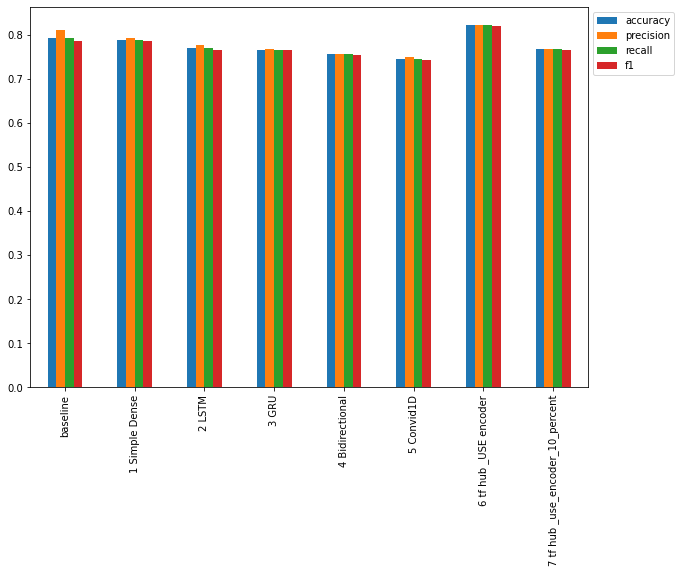

In [113]:
all_model_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0))

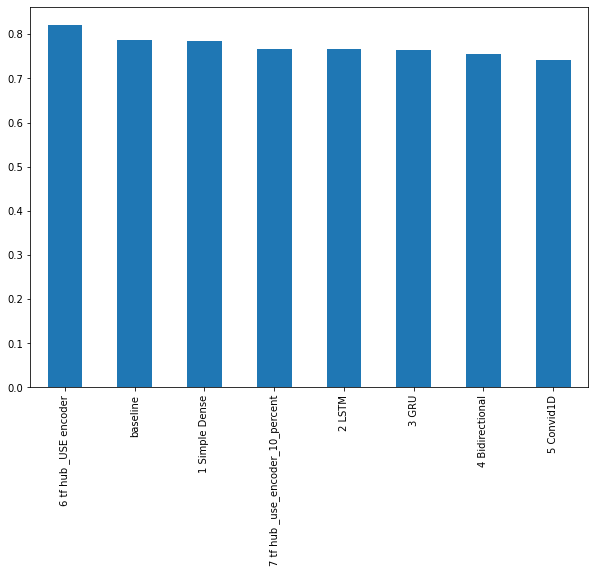

In [114]:
#Sort model results by f1-score
all_model_results.sort_values("f1",ascending=False)['f1'].plot(kind='bar',figsize=(10,7));#Start from highest and go down

#View Tensorboard Logs of transfer learning moddeling experiments 

In [115]:
!tensorboard dev upload --logdir ./model_logs/ \
--name "NLP Modeling experiments" \
--description "Comparing 7 models to one another" \
--one_shot #Exit uploader once uploading is finished

2021-07-20 23:05:14.730208: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./model_logs/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/usr/local/lib/python3.7/dist-packages/tensorboard/main.py", line 46, in run_main
  File "/usr/local/lib/python3.7/dist-p

#Inspect our models performance 

In [116]:
#Finding the most wrong examples, Model drivien exploration (active learning)
#Create dataframe with validation sentences and best performaing model perdicitons 

model6.evaluate(val_sentences,val_labels)

24/24 [==============================] - 0s 13ms/step - loss: 0.4195 - accuracy: 0.8215


[0.41953739523887634, 0.8215222954750061]

In [121]:
val_df = pd.DataFrame({'text':val_sentences,
                       "target":val_labels,
                       'pred':model6_pred,
                       'pred_probs':tf.squeeze(model6_pred_probs)})
val_df.head()


,text,target,pred,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.125167
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.837984
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.986988
3,@camilacabello97 Internally and externally scr...,1,0.0,0.167329
4,Radiation emergency #preparedness starts with ...,1,1.0,0.776537


In [124]:
most_wrong = val_df[val_df["target"] != val_df['pred']].sort_values("pred_probs",ascending=False)

In [126]:
most_wrong.head()

,text,target,pred,pred_probs
759,FedEx will no longer transport bioterror patho...,0,1.0,0.939831
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.912786
628,@noah_anyname That's where the concentration c...,0,1.0,0.892310
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.890203
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.862399


In [127]:
most_wrong.tail()

,text,target,pred,pred_probs
59,You can never escape me. Bullets don't harm me...,1,0.0,0.046350
233,I get to smoke my shit in peace,1,0.0,0.044300
38,Why are you deluged with low self-image? Take ...,1,0.0,0.043640
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.039185
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.036771


In [128]:
#Check the false positives (model perdicited 1 when should of been 0)

for row in most_wrong[:10].itertuples():
  _,text, target, pred,pred_probs = row
  print(f"target:{target},Pred:{pred},Prob:{pred_probs}")
  print(f"text {text}\n")
  print("----\n")


target:0,Pred:1.0,Prob:0.9398309588432312
text FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

target:0,Pred:1.0,Prob:0.9127857685089111
text ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

target:0,Pred:1.0,Prob:0.8923099040985107
text @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

target:0,Pred:1.0,Prob:0.8902031183242798
text [55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY

----

target:0,Pred:1.0,Prob:0.8623986840248108
text Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

target:0,Pred:1.0,Prob:0.8566797971725464
text @AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

---

In [129]:
#Check the false negatives (model perdicted on 0 and was actually 1 )

for row in most_wrong[-10:].itertuples():
  _,text, target, pred,pred_probs = row
  print(f"target:{target},Pred:{pred},Prob:{pred_probs}")
  print(f"text {text}\n")
  print("----\n")

target:1,Pred:0.0,Prob:0.0654611885547638
text @DavidVonderhaar At least you were sincere ??

----

target:1,Pred:0.0,Prob:0.06401634216308594
text @BoyInAHorsemask its a panda trapped in a dogs body

----

target:1,Pred:0.0,Prob:0.057252734899520874
text @reriellechan HE WAS THE LICH KING'S FIRST CASUALTY BLOCK ME BACK I HATE YOU! http://t.co/0Gidg9U45J

----

target:1,Pred:0.0,Prob:0.048909127712249756
text @willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

target:1,Pred:0.0,Prob:0.04752039909362793
text Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube

----

target:1,Pred:0.0,Prob:0.04635003209114075
text You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

target:1,Pred:0.0,Prob:0.044300079345703125
text I get to smoke my shit in peace

----

target:1,Pred:

In [130]:
 test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [137]:
test_df_text = test_df['text'].drop(columns=0)
test_df_text = tf.squeeze(test_df_text)
test_df_text

<tf.Tensor: shape=(3263,), dtype=string, numpy=
array([b'Just happened a terrible car crash',
       b'Heard about #earthquake is different cities, stay safe everyone.',
       b'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
       ..., b'Green Line derailment in Chicago http://t.co/UtbXLcBIuY',
       b'MEG issues Hazardous Weather Outlook (HWO) http://t.co/3X6RBQJHn3',
       b'#CityofCalgary has activated its Municipal Emergency Plan. #yycstorm'],
      dtype=object)>

In [138]:
model7_test_perds= model7.predict(test_df_text)

In [139]:
model7_test_perds

array([[0.83855426],
       [0.6726077 ],
       [0.71246654],
       ...,
       [0.3815929 ],
       [0.52578425],
       [0.4992405 ]], dtype=float32)

In [140]:
model7_test_pred = tf.squeeze(tf.round(model7_test_perds))

In [145]:
model7_test_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.], dtype=float32)>

In [149]:
val_df = pd.DataFrame({'text':val_sentences,
                       "target":val_labels,
                       'pred':model7_test_pred,
                       'pred_probs':model7_test_perds})
val_df.head()

len(model7_test_perds), len(model7_test_pred)

ValueError: ignored

In [150]:
len(model7_test_perds), len(model7_test_pred)

(3263, 3263)

In [151]:
len(val_labels)

762

In [152]:
len(val_sentences)

762